In [0]:
from sklearn import preprocessing
import matplotlib.pylab as plt
%matplotlib inline
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import cohen_kappa_score

In [0]:
import numpy as np 
import pandas as pd 

## Import Dataset

In [0]:
 from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Big Data/Final Project/ImageDataWith_Labels.csv')

In [0]:
data.head(5)

,Unnamed: 0,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,67460,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,ISIC_0000000,benign,172,194,222,161,189,222,162,198,231,164,202,233,165,203,235,167,204,237,169,206,238,173,209,239,174,210,240,176,211,241,178,213,242,179,213,243,182,213,...,248,197,231,249,197,231,249,196,230,248,196,231,249,194,230,250,193,229,250,195,229,250,196,229,250,194,229,249,193,230,248,194,230,249,194,229,248,195,231,250
1,ISIC_0000001,benign,156,155,162,146,145,152,150,148,154,153,150,156,157,155,160,160,158,161,163,160,163,165,163,169,166,163,170,169,167,172,171,170,176,175,173,178,175,174,...,198,189,189,198,189,189,197,190,190,196,191,191,197,190,190,198,188,188,197,190,189,196,190,189,195,187,187,193,186,186,193,185,185,191,185,183,192,191,189,197
2,ISIC_0000002,malignant,66,66,66,40,40,40,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,40,41,40,41,43,...,206,132,157,203,123,147,192,115,137,180,110,133,177,103,130,177,98,122,165,90,113,158,81,101,149,73,91,132,64,82,110,57,71,91,53,60,71,70,74,81
3,ISIC_0000004,malignant,64,64,64,38,38,38,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,...,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,61,61,61
4,ISIC_0000006,benign,66,66,66,40,40,40,41,41,41,41,41,41,41,41,41,41,41,41,40,40,40,41,41,41,41,41,41,41,41,41,40,40,40,41,41,41,43,45,...,160,116,132,151,110,123,143,109,118,143,102,112,135,94,102,124,87,95,117,81,88,105,75,82,92,66,74,81,62,66,72,58,59,63,47,51,52,68,69,67


In [0]:
len(data)

900

## Train-Test Split (0.7, 0.3)

In [0]:
X = data.drop(['Unnamed: 0','y'],axis =1)


In [0]:
y = data['y']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y, random_state = 200)

In [0]:
print(len(X_train),len(X_test),len(y_train), len(y_test))

675 225 675 225


## Fit XGBoost Model

In [0]:
my_model = XGBClassifier(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
predictions = my_model.predict(X_test)

In [0]:
accuracy_score(y_test,predictions)

0.8222222222222222

In [0]:
y_train_preds = my_model.predict(X_train)
y_test_preds = my_model.predict(X_test)
# Print F1 scores and Accuracy
print("Training F1 Micro Average: ", f1_score(y_train, y_train_preds, average = "micro"))
print("Test F1 Micro Average: ", f1_score(y_test, y_test_preds, average = "micro"))
print("Test Accuracy: ", accuracy_score(y_test, y_test_preds))

Training F1 Micro Average:  0.8474074074074074
Test F1 Micro Average:  0.8222222222222222
Test Accuracy:  0.8222222222222222


In [0]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test,y_test_preds)
cm1

array([[182,  10],
       [ 30,   3]])

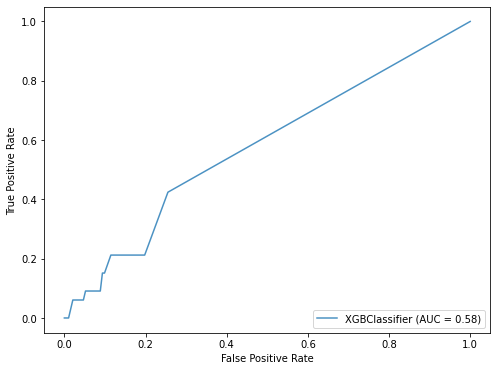

In [0]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(8,6))

ax = plt.gca()

plot_roc_curve(my_model,X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## Further setup parameters to refit XGBoost model

In [0]:
XGBOOST_PARAM = {
    'learning_rate=0.05'
    "random_state" : 200,
    'objective': 'multi:softmax',
    "num_class" : 2,
    "n_estimators" : 1000,
    "eval_metric" : "mlogloss"
}

In [0]:
xgb_model_1 = xgb.XGBClassifier(**XGBOOST_PARAM)
xgb_model_1 = xgb_model_1.fit(X_train,y_train,
                        eval_set=[(X_test, y_test)],
                        early_stopping_rounds=20,
                        verbose=False)
prediction = xgb_model_1.predict(X_test)

In [0]:
accuracy_score(y_test,prediction)

0.84

In [0]:
y_train_pred = xgb_model_1.predict(X_train)
y_test_pred = xgb_model_1.predict(X_test)
# Print F1 scores and Accuracy
print("Training F1 Micro Average: ", f1_score(y_train, y_train_pred, average = "micro"))
print("Test F1 Micro Average: ", f1_score(y_test, y_test_pred, average = "micro"))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Training F1 Micro Average:  0.9377777777777777
Test F1 Micro Average:  0.8399999999999999
Test Accuracy:  0.84


#### Features extraction - Cohen Kappa quadratic score

Cohen Kappa quadratic score 0.0513000702740688


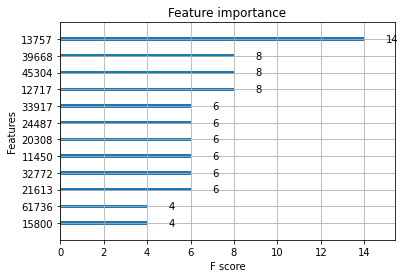

In [0]:
from sklearn.metrics import cohen_kappa_score

print("Cohen Kappa quadratic score", 
      cohen_kappa_score(y_test, prediction, weights="quadratic"))
xgb.plot_importance(xgb_model_1, max_num_features=12)

## Corss-Validation (5-fold）

In [0]:
y_num = y

In [0]:
#Transform to NUM for dmatrix
for i in range(0,900):
  if y[i] == 'benign':
    y_num[i] = 0
  if y[i] == 'malignant':
    y_num[i] = 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
data_dmatrix = xgb.DMatrix(data=X,label=y_num)

In [0]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=XGBOOST_PARAM, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="mlogloss", as_pandas=True, seed=200)

In [0]:
cv_results[0:]

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
0,0.544297,0.010132,0.583563,0.011384
1,0.438240,0.008393,0.539845,0.016338
2,0.372833,0.019572,0.518918,0.025044
3,0.292960,0.012762,0.494998,0.029285
4,0.232497,0.003572,0.483765,0.036137
5,0.181424,0.004310,0.474284,0.048360


In [0]:
xgb_model_2 = XGBClassifier(**XGBOOST_PARAM)

In [0]:
#set cv_results parameters
xgb_model_2.set_params(n_estimators=cv_results.shape[0])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, learning_rate=0.1, learning_rate=0.05random_state=200,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=6, n_jobs=1, nthread=None, num_class=2,
              objective='multi:softmax', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [0]:
xgb_model_2.fit(X_train, y_train, eval_metric='mlogloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, learning_rate=0.1, learning_rate=0.05random_state=200,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=6, n_jobs=1, nthread=None, num_class=2,
              objective='multi:softmax', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [0]:
prediction_2 = xgb_model_2.predict(X_test)

In [0]:
accuracy_score(y_test,prediction_2)

0.8266666666666667

In [0]:
y_train_pred2 = xgb_model_2.predict(X_train)
y_test_pred2 = xgb_model_2.predict(X_test)
# Print F1 scores and Accuracy
print("Training F1 Micro Average: ", f1_score(y_train, y_train_pred2, average = "micro"))
print("Test F1 Micro Average: ", f1_score(y_test, y_test_pred2, average = "micro"))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred2))

Training F1 Micro Average:  0.8577777777777779
Test F1 Micro Average:  0.8266666666666667
Test Accuracy:  0.8266666666666667


Cohen Kappa quadratic score 0.05978784956605587


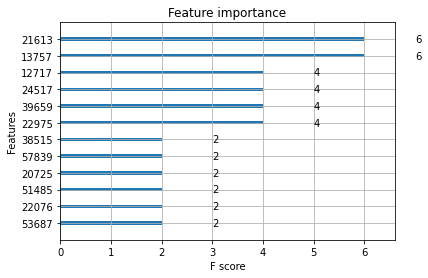

In [0]:
print("Cohen Kappa quadratic score", 
      cohen_kappa_score(y_test, prediction_2, weights="quadratic"))
xgb.plot_importance(xgb_model_2, max_num_features=12)